# Course Overview: From Novice to Multi-Agent RAG System Builder

This course is designed to be a hands-on, project-based learning experience. We'll start with the foundational concepts and progressively build a sophisticated, yet manageable, multi-agent system that can help you analyze financial news and generate stock ideas.

Learning Objectives:
* Understand the fundamentals of Retrieval-Augmented Generation (RAG) and multi-agent systems.
* Master the core components of LangGraph, including state, nodes, and edges.
* Develop a multi-agent RAG system for a real-world application.
* Integrate external tools, such as a financial news API, into your system.
* Implement a Model Context Protocol (MCP) interaction for structured agent communication.
* Gain proficiency in building and debugging AI applications in a Jupyter Notebook environment.

The Project: A Financial News Analysis and Stock Idea Generator
We'll build a multi-agent system that takes a stock ticker as input and outputs a concise analysis and a potential trading idea. This project will involve three specialized agents working together:

1. The News Researcher Agent: This agent's job is to find the latest financial news for a given stock. This is the "Retrieval" part of our RAG system.
2. The Data Analyst Agent: This agent will take the news articles, analyze the sentiment (positive, negative, or neutral), and summarize the key information.
3. The Trading Idea Generator Agent: This agent will receive the structured analysis from the Data Analyst and, based on the sentiment and news summary, will generate a brief, actionable trading idea.


# Setting Up Your Workspace

1. Install VS Code: If you haven't already, download and install Visual Studio Code.
2. Install Python: Make sure you have Python installed. You can get it from the official Python website.
3. Install VS Code Extensions: Open VS Code, go to the Extensions view (the icon with four squares on the sidebar), and install the Python and Jupyter extensions by Microsoft.
4. Create a Project Folder: Create a new folder on your computer named LangGraph-Stock-Analyzer.
5. Open in VS Code: Open this folder in VS Code (File > Open Folder...).
6. Create a Virtual Environment:
   ```
   conda create -n stock-analyzer-env python=3.11
   conda activate stock-analyzer-env
   ```

7. Create Your Notebook: Create a new file named stock_analyzer.ipynb. This will be your workspace for the entire project.

# Module 1: Foundations

Introduction to Key Concepts
* Retrieval-Augmented Generation (RAG): Imagine you're a financial analyst. You don't just give stock advice from memory; you first retrieve relevant documents like news reports and SEC filings, and then you use that information to generate your analysis. RAG systems work the same way. They first fetch information from a data source (like a news API) and then use a Large Language Model (LLM) to generate an informed response.
* Multi-Agent Systems: Instead of one single program trying to do everything, we can create a team of specialized "agents." In our project, we'll have a "Researcher" agent to get news, an "Analyst" agent to interpret it, and an "Idea Generator" agent to suggest trades. They work together, each handling one part of the task.
* LangGraph: This is our toolkit for managing the team of agents. It allows us to define a workflow, or "graph," that dictates who does what and in what order. It's like a project manager for our AI agents, ensuring they work together smoothly and maintain a shared understanding of the task through a "state."

## Installing Required Libraries

In [ ]:
%pip install langgraph langchain langchain-community langchain_openai beautifulsoup4 yfinance duckduckgo-search dotenv

  Using cached langchain-0.3.25-py3-none-any.whl.metadata (7.8 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached langchain_text_splitters-0.3.8-py3-none-any.whl.metadata (1.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any

In [ ]:
%pip install pygraphviz # For Jupyter Notebook, you may need to install pygraphviz separately

In [6]:
%pip install langchain-community

  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.9.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 48.2 MB/s eta 0:00:00
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
Using cached marshmallow-3.26.1-py3-none-any.whl (50 kB)
Using cached pydantic_settings-2.9.1-py3-none-any.wh

## Setting Up Your API Key
We need an LLM to power our agents. We'll use OpenAI's models.

1. Go to the OpenAI API keys page and create a new secret key.
2. Place in .env file 
   ```
   OPENAI_API_KEY = "your-key-here"
   ```

In [1]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

True

## Your First "Hello, LangGraph!"
Let's build a tiny two-step graph to see how it works. This will not be part of the final project, but it's a great warm-up.

When you run this, you'll see the print statements from each node executing in order, the final result, and a visual diagram of your simple graph. This demonstrates the core concepts: State, Nodes, and Edges.

---EXECUTING NODE ONE---
---EXECUTING NODE TWO---

---FINAL RESULT---
Hello, LangGraph!


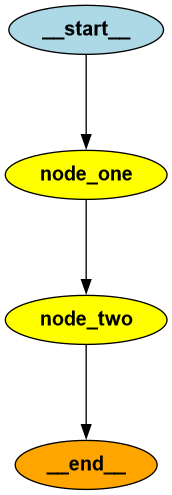

In [1]:
import os
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END

# Define the state: the data that flows through the graph
class SimpleState(TypedDict):
    input: str
    result: str

# Initialize our LLM
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# Define our nodes (the "workers" in the graph)
def node_one(state: SimpleState):
    print("---EXECUTING NODE ONE---")
    state['result'] = "Hello"
    return state

def node_two(state: SimpleState):
    print("---EXECUTING NODE TWO---")
    state['result'] = state['result'] + ", LangGraph!"
    return state

# Build the graph
workflow = StateGraph(SimpleState)
workflow.add_node("node_one", node_one)
workflow.add_node("node_two", node_two)

# Set the entrypoint and edges
workflow.set_entry_point("node_one")
workflow.add_edge("node_one", "node_two")
workflow.add_edge("node_two", END) # The END node signifies the graph is finished

# Compile and run the graph
app = workflow.compile()
initial_state = {"input": "start", "result": ""}
final_state = app.invoke(initial_state)

print("\n---FINAL RESULT---")
print(final_state['result'])

# You can also visualize the graph!
from IPython.display import Image, display
display(Image(app.get_graph().draw_png()))

# Module 2: Building the Agent Tools
Now, let's build the tools our stock analysis agents will use. We'll define them as simple Python functions for now.

## Tool 1: The News Researcher
This tool will use the ```yfinance``` library to fetch news for a stock and ```DuckDuckGoSearch``` for more general news.

In [8]:
import yfinance as yf
from langchain.tools import DuckDuckGoSearchRun

def get_stock_news(ticker: str) -> list:
    """Gets recent news for a stock ticker using yfinance."""
    print(f"---RESEARCHER: Searching news for {ticker}---")
    stock = yf.Ticker(ticker)
    # yfinance often returns a list of dictionaries, we'll just return them
    return stock.news or []

def general_search(query: str) -> str:
    """Performs a general web search using DuckDuckGo."""
    print(f"---RESEARCHER: Performing general search for '{query}'---")
    search = DuckDuckGoSearchRun()
    return search.run(query)

# Let's test our news tool
ticker = "AAPL"
news_results = get_stock_news(ticker)

if news_results:
    # It's helpful to print one raw item to see its structure
    print("---Sample Raw News Item---")
    print(news_results[0])  # Print the first news item to see its structure
    print(f"Found {len(news_results)} news articles for {ticker} using yfinance.")
    print("-" * 30  )
    for item in news_results[:2]: # Print first 2 articles
        # Use .get() to safely access keys that may not exist
        title = item.get('title', 'No title available')
        link = item.get('link', 'No link available')
        
        print(f"Title: {title}")
        print(f"Link: {link}")
        print("-" * 20)
else:
    print(f"No news found for {ticker} using yfinance. Let's try a general search.")
    general_query = f"latest financial news for {ticker}"
    general_results = general_search(general_query)
    print(general_results)

---RESEARCHER: Searching news for AAPL---
---Sample Raw News Item---
{'id': '27bb5b20-7972-3619-930c-5337a4221451', 'content': {'id': '27bb5b20-7972-3619-930c-5337a4221451', 'contentType': 'VIDEO', 'title': 'GameStop earnings, US-China talks, May CPI: What to Watch', 'description': '<p>Market Domination Overtime hosts <a data-i13n="cpos:1;pos:1" href="https://finance.yahoo.com/author/julie-hyman/">Julie Hyman</a> and <a data-i13n="cpos:2;pos:1" href="https://finance.yahoo.com/author/josh-lipton/">Josh Lipton</a> preview the top market stories and headlines Wall Street will be paying attention to next week, including corporate earnings from companies like GameStop (<a data-i13n="cpos:3;pos:1" href="https://finance.yahoo.com/quote/GME">GME</a>), Oracle (<a data-i13n="cpos:4;pos:1" href="https://finance.yahoo.com/quote/ORCL">ORCL</a>), Adobe (<a data-i13n="cpos:5;pos:1" href="https://finance.yahoo.com/quote/ADBE">ADBE</a>), and the J.M. Smucker Company (<a data-i13n="cpos:6;pos:1" href="h

In [9]:
import yfinance as yf
from langchain_community.tools import DuckDuckGoSearchRun  # Updated import for LangChain v0.1+

def get_stock_news(ticker: str) -> list:
    """Gets recent news for a stock ticker using yfinance."""
    print(f"---RESEARCHER: Searching news for {ticker}---")
    stock = yf.Ticker(ticker)
    return stock.news or []

def general_search(query: str) -> str:
    """Performs a general web search using DuckDuckGo."""
    print(f"---RESEARCHER: Performing general search for '{query}'---")
    search = DuckDuckGoSearchRun()
    return search.run(query)

# Let's test our news tool
ticker = "AAPL"
news_results = get_stock_news(ticker)

if news_results:
    print("---Sample Raw News Item---")
    print(news_results[0])  # Print the first raw item for inspection
    print(f"Found {len(news_results)} news articles for {ticker} using yfinance.")
    print("-" * 30)
    
    for item in news_results[:2]:  # Print first 2 articles
        content = item.get("content", {})

        # Use nested get() safely
        title = content.get("title", "No title available")
        link = (
            content.get("clickThroughUrl", {}).get("url") or
            content.get("canonicalUrl", {}).get("url") or
            "No link available"
        )

        print(f"Title: {title}")
        print(f"Link: {link}")
        print("-" * 20)

else:
    print(f"No news found for {ticker} using yfinance. Let's try a general search.")
    general_query = f"latest financial news for {ticker}"
    general_results = general_search(general_query)
    print(general_results)


---RESEARCHER: Searching news for AAPL---
---Sample Raw News Item---
{'id': '27bb5b20-7972-3619-930c-5337a4221451', 'content': {'id': '27bb5b20-7972-3619-930c-5337a4221451', 'contentType': 'VIDEO', 'title': 'GameStop earnings, US-China talks, May CPI: What to Watch', 'description': '<p>Market Domination Overtime hosts <a data-i13n="cpos:1;pos:1" href="https://finance.yahoo.com/author/julie-hyman/">Julie Hyman</a> and <a data-i13n="cpos:2;pos:1" href="https://finance.yahoo.com/author/josh-lipton/">Josh Lipton</a> preview the top market stories and headlines Wall Street will be paying attention to next week, including corporate earnings from companies like GameStop (<a data-i13n="cpos:3;pos:1" href="https://finance.yahoo.com/quote/GME">GME</a>), Oracle (<a data-i13n="cpos:4;pos:1" href="https://finance.yahoo.com/quote/ORCL">ORCL</a>), Adobe (<a data-i13n="cpos:5;pos:1" href="https://finance.yahoo.com/quote/ADBE">ADBE</a>), and the J.M. Smucker Company (<a data-i13n="cpos:6;pos:1" href="h

# Module 3 & 4: Building the Graph with MCP
Now we combine everything. We will define the agents, the graph state, and the graph itself. We'll also implement our Model Context Protocol (MCP) here.

Our MCP Implementation: The Data Analyst agent's job is to take unstructured news and structure it. It will output a strict JSON object containing a summary and a sentiment score. This structured data is the "protocol." The Trading Idea Generator agent is then built to only accept this specific structure, making the communication between them clear and reliable.

## The Full Multi-Agent RAG System
Let's define the state, nodes, and the graph.

In [15]:
import os
import json
from typing import TypedDict, Annotated, List
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages

# --- 1. Define the State ---
# This is the shared memory that all agents will read from and write to.

class AgentState(TypedDict):
    ticker: str
    news: List[dict]  # A list of news articles from yfinance
    analysis: str # This will hold our structured MCP data
    recommendation: str
    # This is a special field for managing chat history
    messages: Annotated[list, add_messages]

# --- 2. Define the Tools & The MCP Data Model ---

# Initialize our tools
llm = ChatOpenAI(model="gpt-4o", temperature=0)
news_tool = get_stock_news # Using our function from before
search_tool = DuckDuckGoSearchRun()

# Define our MCP data structure using Pydantic
# The Analyst Agent MUST return data in this format.
class Analysis(BaseModel):
    """The result of a detailed financial news analysis."""
    summary: str = Field(description="A concise summary of the key news points.")
    sentiment_score: float = Field(description="A sentiment score from -1.0 (very negative) to 1.0 (very positive).")

# --- 3. Define the Agent Nodes ---

def researcher_node(state: AgentState):
    """
    Fetches news for the given stock ticker.
    This is the "Retrieval" part of our RAG system.
    """
    print("---NODE: RESEARCHER---")
    ticker = state['ticker']
    messages = state.get('messages', [])
    
    # Get news from yfinance
    news_items = news_tool(ticker)
    
    # If yfinance finds nothing, use a general search tool as a fallback
    if not news_items:
        print(f"No yfinance news for {ticker}, using DuckDuckGo.")
        query = f"latest financial news and developments for {ticker} stock"
        search_results = search_tool.run(query)
        # We need to wrap this text result in the same structure as yfinance news
        news_items = [{"title": "General Search Results", "summary": search_results}]

    return {"news": news_items, "messages": messages + [("system", f"Found news for {ticker}.")]}

def analyst_node(state: AgentState):
    """
    Analyzes the news and produces a structured output (our MCP).
    """
    print("---NODE: ANALYST---")
    news_items = state['news']
    messages = state.get('messages', [])
    
    # Combine the news titles and summaries into one block of text for the LLM
    news_text = "\n\n".join([item.get('title', '') + ": " + item.get('summary', '') for item in news_items])
    
    # Use the LLM with function calling to force a structured JSON output
    # This enforces our Model Context Protocol (MCP)
    structured_llm = llm.with_structured_output(Analysis)
    
    prompt = f"""
    You are a senior financial analyst. Analyze the following news for the stock ticker {state['ticker']}.
    Provide a concise summary and a sentiment score from -1.0 (very negative) to 1.0 (very positive).

    News articles:
    {news_text}
    """
    
    analysis_result = structured_llm.invoke(prompt)
    
    # Convert the Pydantic model to a JSON string to store in the state
    analysis_json = analysis_result.model_dump_json()
    
    return {"analysis": analysis_json, "messages": messages + [("system", f"Analysis complete for {ticker}.")]}

def trading_idea_node(state: AgentState):
    """
    Generates a trading idea based on the structured analysis.
    """
    print("---NODE: TRADING IDEA GENERATOR---")
    analysis_json = state['analysis']
    messages = state.get('messages', [])
    
    # Parse the JSON string back into a Python dictionary
    analysis = json.loads(analysis_json)
    sentiment = analysis['sentiment_score']
    summary = analysis['summary']
    
    prompt = f"""
    You are a trading strategist. Based on the following analysis, generate a brief, actionable trading idea.
    If sentiment is highly positive (> 0.6), suggest a bullish stance.
    If sentiment is highly negative (< -0.6), suggest a bearish stance.
    Otherwise, suggest a neutral or 'wait and see' approach.

    Analysis Summary: {summary}
    Sentiment Score: {sentiment}
    """
    
    response = llm.invoke(prompt)
    recommendation = response.content
    
    return {"recommendation": recommendation, "messages": messages + [("system", f"Trading idea generated.")]}


# --- 4. Define Conditional Logic ---

def should_continue(state: AgentState):
    """Determines whether to continue to the analysis step or end."""
    if state['news']:
        # We have news, so proceed to the analyst
        return "analyst"
    else:
        # No news found, so end the graph
        return END

# --- 5. Build the Graph ---

# Instantiate the graph
workflow = StateGraph(AgentState)

# Add the nodes
workflow.add_node("researcher", researcher_node)
workflow.add_node("analyst", analyst_node)
workflow.add_node("trader", trading_idea_node)

# Define the edges and control flow
workflow.set_entry_point("researcher")
workflow.add_conditional_edges(
    "researcher",
    should_continue, # The function that makes the decision
    {
        "analyst": "analyst", # If it returns "analyst", go to the analyst node
        END: END              # If it returns END, finish
    }
)
workflow.add_edge('analyst', 'trader')
workflow.add_edge('trader', END)

# Compile the graph into a runnable application
app = workflow.compile()

# Module 5: Finalizing and Running Your System
Now, let's run our multi-agent system and see the results.

## Executing the Stock Analysis
You can change the ticker variable to analyze different companies like 'TSLA', 'GOOG', or 'MSFT'.

When you run this final cell, you will see the step-by-step execution of your multi-agent system. You'll see the researcher fetch the news, the analyst create the structured JSON output (your MCP in action!), and the trader generate the final idea. Finally, you will see the visual representation of the workflow you just built.

Congratulations! You have now designed and built a multi-agent RAG system with LangGraph.

---CURRENT STATE---
{'ticker': 'MSFT', 'messages': [HumanMessage(content='Analyze the stock MSFT', additional_kwargs={}, response_metadata={}, id='c4096462-79a8-448b-8ade-e422b4738727')]}


---NODE: RESEARCHER---
---RESEARCHER: Searching news for MSFT---
---CURRENT STATE---
{'ticker': 'MSFT', 'news': [{'id': 'e2903548-b399-3dc5-a8ba-b3fb87653e84', 'content': {'id': 'e2903548-b399-3dc5-a8ba-b3fb87653e84', 'contentType': 'VIDEO', 'title': 'Microsoft reclaims top spot, Omada IPO, Vail trims outlook', 'description': '<p>Market Domination co-host <a data-i13n="cpos:1;pos:1" href="https://finance.yahoo.com/author/josh-lipton/">Josh Lipton</a> tracks today\'s top moving stocks and biggest market stories in this<a data-i13n="cpos:2;pos:1" href="https://finance.yahoo.com/videos/series/market-minute/"> Market Minute</a>.</p>\n<p>Microsoft (<a data-i13n="cpos:3;pos:1" href="https://finance.yahoo.com/quote/MSFT">MSFT</a>) stock opens at a fresh all-time high, reclaiming the title of world’s most v

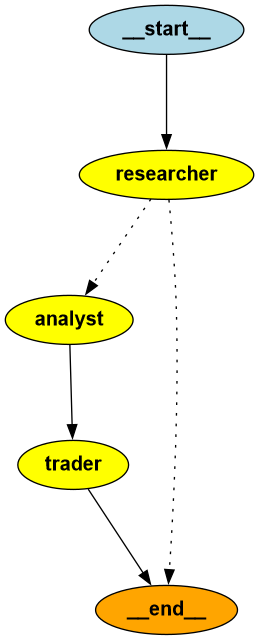

In [26]:
from IPython.display import Image, display
import textwrap

def wrapped_output(label, text, width=80, indent=4):
    indent_str = ' ' * indent
    wrapped = textwrap.fill(
        text,
        width=width,
        initial_indent=indent_str,
        subsequent_indent=indent_str
    )
    return f"{label}:\n{wrapped}"


# Define the input for our graph
ticker_to_analyze = "MSFT"
inputs = {"ticker": ticker_to_analyze, "messages": [("user", f"Analyze the stock {ticker_to_analyze}")]}

# Invoke the graph and stream the results
for event in app.stream(inputs, stream_mode="values"):
    # The 'values' stream_mode returns the entire state at each step
    print("---CURRENT STATE---")
    print(event)
    print("\n" + "="*30 + "\n")

# The final state is the last event from the stream
final_state = event

print("\n" + wrapped_output("📈 FINAL RECOMMENDATION", final_state['recommendation']))
#print("\n---FINAL RECOMMENDATION---")
#print(final_state['recommendation'])

# Visualize the final graph structure
print("\n---GRAPH VISUALIZATION---")
try:
    display(Image(app.get_graph().draw_png()))
except Exception as e:
    print(f"Could not draw graph: {e}. You might need to install graphviz.")
    # On macOS: brew install graphviz
    # On Linux: sudo apt-get install graphviz
    # On Windows: you may need to install from source or use a package manager like conda.


---✅ CURRENT STATE ---
🔁 Event:
    {'ticker': 'MSFT', 'messages': [HumanMessage(content='Analyze the stock
    MSFT', additional_kwargs={}, response_metadata={},
    id='fecbedf1-71d8-470e-9571-1ef09d92a34a')]}

---NODE: RESEARCHER---
---RESEARCHER: Searching news for MSFT---

---✅ CURRENT STATE ---
📰 News Titles:
    1. No Title 2. No Title 3. No Title

---NODE: ANALYST---

---✅ CURRENT STATE ---
🧠 Summary:
    The news articles provided do not contain any specific information or
    context to analyze. Please provide detailed news content for a comprehensive
    analysis.
📊 Sentiment Score:
    0.0

---NODE: TRADING IDEA GENERATOR---

---✅ CURRENT STATE ---
🧠 Summary:
    The news articles provided do not contain any specific information or
    context to analyze. Please provide detailed news content for a comprehensive
    analysis.
📊 Sentiment Score:
    0.0


✅ FINAL RECOMMENDATION:
    Based on the sentiment score of 0.0, which indicates a neutral sentiment,
    the actionable 

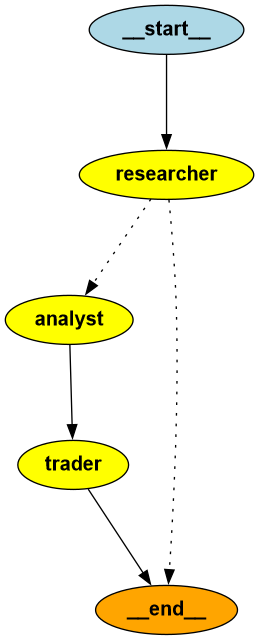

In [25]:
from IPython.display import Image, display
import textwrap

def wrapped_output(label, text, width=80, indent=4):
    indent_str = ' ' * indent
    wrapped = textwrap.fill(
        text,
        width=width,
        initial_indent=indent_str,
        subsequent_indent=indent_str
    )
    return f"{label}:\n{wrapped}"

# Define the input for our graph
ticker_to_analyze = "MSFT"
inputs = {"ticker": ticker_to_analyze, "messages": [("user", f"Analyze the stock {ticker_to_analyze}")]}

# Invoke the graph and stream the results
for event in app.stream(inputs, stream_mode="values"):
    print("\n---✅ CURRENT STATE ---")
    
    # Print key pieces from state with wrapping
    if 'analysis' in event and event['analysis']:
        analysis = json.loads(event['analysis'])
        print(wrapped_output("🧠 Summary", analysis.get('summary', '')))
        print(wrapped_output("📊 Sentiment Score", str(analysis.get('sentiment_score', 'N/A'))))
    elif 'news' in event:
        print(wrapped_output("📰 News Titles", "\n".join([
            f"{i+1}. {item.get('title', 'No Title')}" for i, item in enumerate(event['news'][:3])
        ])))
    elif 'recommendation' in event:
        print(wrapped_output("📈 Trading Recommendation", event['recommendation']))
    else:
        print(wrapped_output("🔁 Event", str(event)))

    print("\n" + "="*40)

# Store final state
final_state = event

# Display Final Recommendation
print("\n" + wrapped_output("✅ FINAL RECOMMENDATION", final_state['recommendation']))

# Visualize the graph
print("\n--- GRAPH VISUALIZATION ---")
try:
    display(Image(app.get_graph().draw_png()))
except Exception as e:
    print(f"Could not draw graph: {e}")
